<a href="https://colab.research.google.com/github/FrancescoMorri/Language_Classification/blob/main/notebooks/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np

sns.set()

PATH = "/content/drive/MyDrive/language/"

In [ ]:
words = pd.read_csv(PATH+"words_all_unique.csv", usecols=['spelling', 'lexicality'])

# Loss

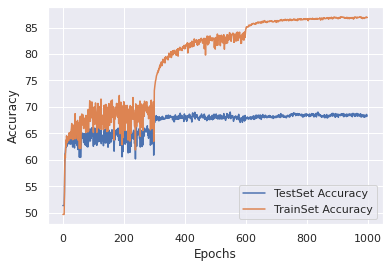

In [ ]:
data = np.loadtxt(PATH+"graphs/feed_forward_5chars_MSE_2.csv")
plt.plot(data[:,0], data[:,2], label="TestSet Accuracy")
plt.plot(data[:,0], data[:,3], label="TrainSet Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.yscale("log")
#plt.savefig(PATH+"graphs/MSE_2_acc.png", bbox_inches='tight')
plt.show()

# General Analysis

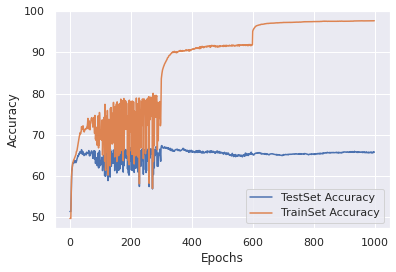

In [ ]:
data = np.loadtxt(PATH+"graphs/feed_forward_5chars_MSE_1.csv")
plt.plot(data[:,0], data[:,2], label="TestSet Accuracy")
plt.plot(data[:,0], data[:,3], label="TrainSet Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.yscale("log")
plt.savefig(PATH+"graphs/MSE_1_acc.png", bbox_inches='tight')
plt.show()

72.6835


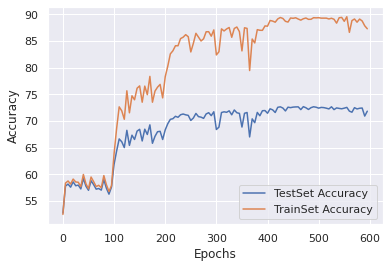

In [ ]:
data = np.loadtxt(PATH+"graphs/feed_forward_10chars_MSE_3_3.csv")
print(max(data[:,2]))
plt.plot(data[:,0], data[:,2], label="TestSet Accuracy")
plt.plot(data[:,0], data[:,3], label="TrainSet Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.yscale("log")
plt.savefig(PATH+"graphs/MSE_10chars_acc_new_best.png", bbox_inches='tight')
plt.show()

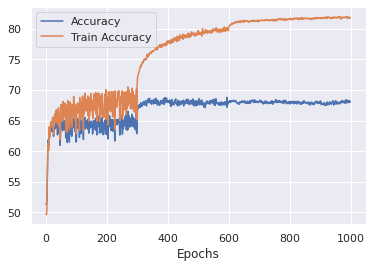

In [ ]:
data = np.loadtxt(PATH+"graphs/5char_info_2_drop.csv")
plt.plot(data[:,0], data[:,2], label="Accuracy")
plt.plot(data[:,0], data[:,3], label="Train Accuracy")
plt.legend()
plt.xlabel("Epochs")
#plt.yscale("log")
plt.show()

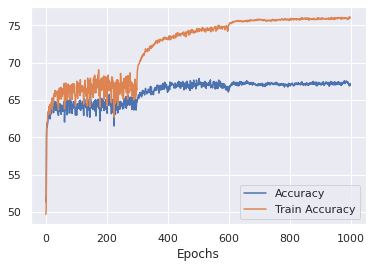

In [ ]:
data = np.loadtxt(PATH+"graphs/5char_info_3_drop.csv")
plt.plot(data[:,0], data[:,2], label="Accuracy")
plt.plot(data[:,0], data[:,3], label="Train Accuracy")
plt.legend()
plt.xlabel("Epochs")
#plt.yscale("log")
plt.show()

In [ ]:
data = np.loadtxt(PATH+"graphs/5char_info_2_drop_batch.csv")
plt.plot(data[:,0], data[:,2], label="Accuracy")
plt.plot(data[:,0], data[:,3], label="Train Accuracy")
plt.legend()
plt.xlabel("Epochs")
#plt.yscale("log")
plt.show()

# Model Accuracy and Word Analysis

## Loading the model

In [ ]:
import torch.nn as nn

class Words_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=130, out_features=64)
        self.linear2 = nn.Linear(in_features=64, out_features=32)
        self.linear3 = nn.Linear(in_features=32, out_features=1)
        #self.linear4 = nn.Linear(in_features=50, out_features=1)

        self.act = nn.ReLU()

    def forward(self, x):
        out = self.linear1(x)
        out = self.act(out)
        out = self.linear2(out)
        out = self.act(out)
        out = self.linear3(out)
        #out = self.act(out)
        #out = self.linear4(out)

        return out

In [ ]:
net = Words_Net()
net.load_state_dict(torch.load(PATH+"/net/feed_forward_5char_MSE"))